In [5]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

In [6]:
images_path = 'C:/Users/asus/Downloads/222/archive (5)/train-images.idx3-ubyte'
labels_path = 'C:/Users/asus/Downloads/222/archive (5)/train-labels.idx1-ubyte'
train_images, train_labels = loadlocal_mnist(images_path=images_path, labels_path=labels_path)

In [7]:
test_images, test_labels = loadlocal_mnist(images_path='C:/Users/asus/Downloads/222/archive (5)/t10k-images.idx3-ubyte',
                                             labels_path='C:/Users/asus/Downloads/222/archive (5)/t10k-labels.idx1-ubyte')

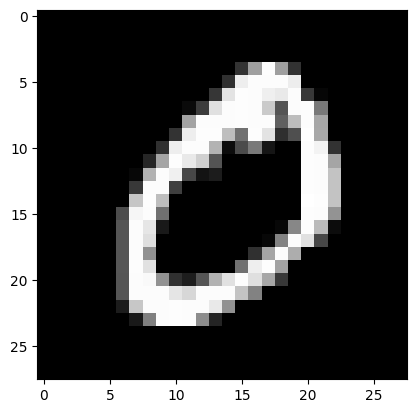

In [8]:
plt.imshow(train_images[1].reshape(28,28), cmap='gray')

In [9]:
train_labels[1]

0

In [10]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [11]:
feature.shape

(144,)

<BarContainer object of 144 artists>

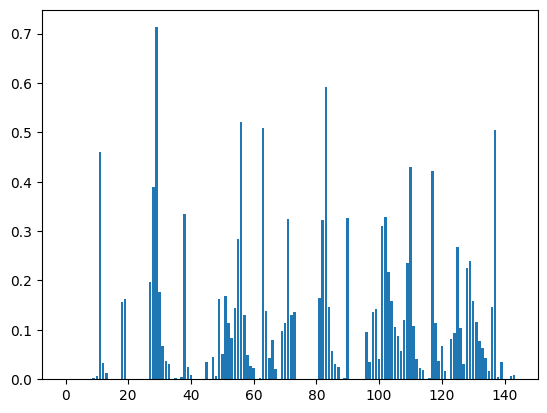

In [12]:
plt.bar(list(range(feature.shape[0])), feature)

In [13]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

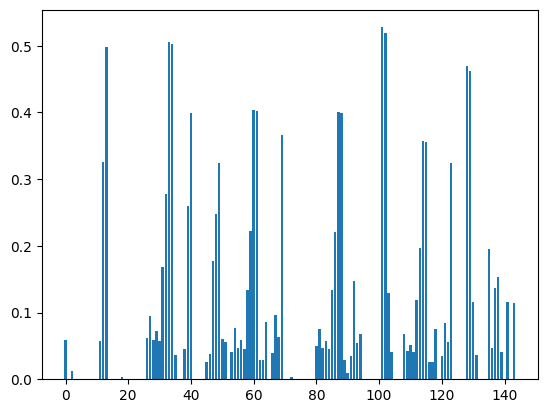

In [14]:
plt.bar(list(range(feature.shape[0])), feature)

In [15]:
n_dims = feature.shape[0]

In [16]:
n_dims

144

In [17]:
n_samples = train_images.shape[0]

In [18]:
n_samples

60000

In [19]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [20]:
X_train.shape

(60000, 144)

In [21]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

In [22]:
from sklearn.preprocessing import LabelBinarizer

In [23]:
lb = LabelBinarizer()

In [24]:
lb.fit(y_train)

LabelBinarizer()

In [25]:
y_train_one_hot = lb.transform(y_train)

In [26]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [27]:
y_train[0]

5

In [28]:
import numpy as np

In [29]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [31]:
label[0]

5

In [32]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [33]:
clf.fit(X_train, y_train_one_hot)

C:\Users\asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

In [34]:
n_samples = test_images.shape[0]

In [35]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [36]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [37]:
y_test_one_hot = lb.transform(y_test)

In [38]:
y_pred_one_hot = clf.predict(X_test)

In [39]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [40]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

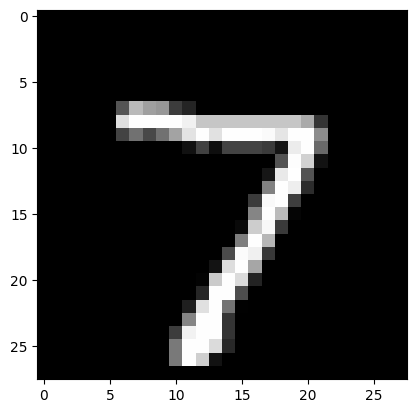

In [41]:
plt.imshow(test_images[0].reshape(28,28), cmap='gray')

In [42]:
out_one_hot = clf.predict(X_test[0].reshape(1, n_dims))

In [43]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [44]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [45]:
out[0]

7

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
conf_mat = confusion_matrix(y_test, y_pred)

In [48]:
conf_mat

array([[ 975,    0,    0,    1,    1,    1,    2,    0,    0,    0],
       [  23, 1107,    1,    0,    1,    0,    2,    1,    0,    0],
       [  46,    4,  971,    1,    0,    0,    1,    8,    0,    1],
       [  35,    0,   18,  946,    0,    3,    0,    4,    1,    3],
       [  35,    4,    0,    0,  928,    0,    5,    3,    0,    7],
       [  35,    0,    1,   11,    0,  837,    0,    0,    7,    1],
       [  26,    3,    1,    0,    7,   10,  909,    0,    2,    0],
       [  37,    3,   21,    2,   12,    0,    0,  940,    1,   12],
       [  55,    3,    3,    9,    0,    4,    0,    1,  893,    6],
       [  40,    0,    0,    2,   13,    4,    0,    7,   11,  932]],
      dtype=int64)

In [65]:
from mlxtend.plotting import plot_confusion_matrix

In [66]:
class_name = [ '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

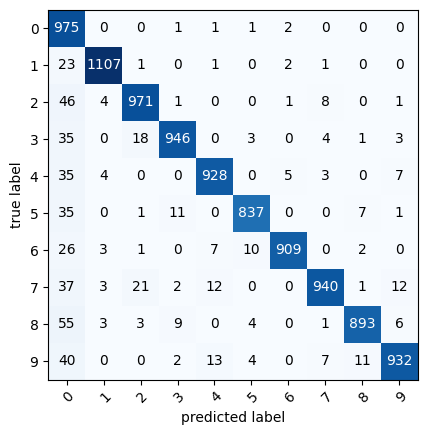

In [67]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_name)

In [52]:
from sklearn.metrics import precision_score

In [53]:
precision = precision_score(y_test, y_pred, average=None)

In [54]:
precision

array([0.74598317, 0.98487544, 0.95570866, 0.97325103, 0.96465696,
       0.97438882, 0.98911861, 0.97510373, 0.97595628, 0.96881497])

In [55]:
from sklearn.metrics import recall_score

In [56]:
recall = recall_score(y_test, y_pred, average=None)

In [57]:
recall

array([0.99489796, 0.9753304 , 0.94089147, 0.93663366, 0.94501018,
       0.93834081, 0.94885177, 0.91439689, 0.91683778, 0.92368682])

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy = accuracy_score(y_test, y_pred)

In [60]:
accuracy

0.9438

In [61]:
from sklearn.metrics import f1_score

In [62]:
f1 = f1_score(y_test, y_pred, average='macro')

In [63]:
f1

0.9449844810626201